In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from sklearn.datasets import make_blobs
# Simple data set 3
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
X.shape

(100, 2)

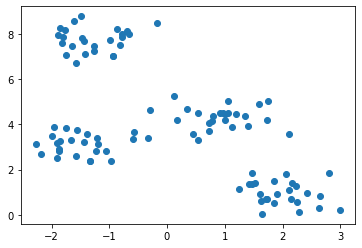

In [3]:
plt.scatter(X[:,0], X[:,1])

In [4]:
from sklearn. cluster import KMeans
kmeans = KMeans()
kmeans.fit(X)
kmeans.inertia_ #returns the SSE value

29.766976079723836

[Problem 1] Determine the initial value of the center point

In [5]:
n_cluster = 4
a = range(X.shape[0])
np.random.seed(0)
first_point = np.random.choice(a, n_cluster, replace=False)
centroid = X[first_point,:]
centroid

array([[-0.565433  ,  3.65813966],
       [ 1.60161834,  0.92363636],
       [ 1.35678894,  4.36462484],
       [-1.26041884,  7.46644456]])

[Problem 2] Creation of a function to obtain SSE

In [6]:
def sse(X):
    dist = np.zeros((X.shape[0], n_cluster))
    for i in range(n_cluster):
        d_a = abs(X - centroid[i,:])
        d_a2 = d_a ** 2
        d_a3 = np.sum(d_a2, axis=1)
        dist[:,i] = d_a3
    sse = 0
    points = np.argmin(dist, axis=1)
    for l in range(n_cluster):
        sse += np.sum(np.min(dist[points==l], axis=1))
        centroid[l, :] = np.mean(X[points==l], axis=0)
    return dist, sse, centroid, points

In [7]:
dist, sse, centroid, points = sse(X)

In [8]:
print(sse)

84.33640249455568


In [9]:
print(dist)

[[1.65763058e+00 8.55890067e+00 8.28397078e-01 1.80103044e+01]
 [2.03503003e+01 6.18610755e+01 2.35634932e+01 6.54839934e-01]
 [4.19405850e+00 1.19003431e+01 0.00000000e+00 1.64710622e+01]
 [3.31850587e+00 1.30395852e+01 1.08282823e-01 1.41975027e+01]
 [6.20659909e+00 1.58511794e+01 3.47030318e-01 1.46940734e+01]
 [2.06173754e+00 1.10972185e+01 3.74624567e-01 1.51552807e+01]
 [1.98402580e+00 2.13656863e+01 1.12264017e+01 1.33994022e+01]
 [1.78609620e+01 5.40217640e+01 1.68908134e+01 4.07442243e-01]
 [3.10188153e+00 2.11566301e+01 2.35830414e+00 6.69836920e+00]
 [1.72167740e+01 5.53410632e+01 1.90122437e+01 9.18947532e-02]
 [1.14806913e+01 4.36507582e+01 1.23092745e+01 3.03503341e-01]
 [1.29929055e+01 4.89150783e+01 1.69236018e+01 4.00797376e-01]
 [1.34050712e+01 4.82748799e+01 1.52225247e+01 4.62943832e-02]
 [1.69181548e+01 5.32939298e+01 1.69501983e+01 1.55193397e-01]
 [1.49011447e+01 4.92429535e+01 1.46307685e+01 1.96001780e-01]
 [2.44846073e+01 2.43644463e+00 1.98363386e+01 7.058040

In [10]:
print(centroid)

[[-1.24587768  3.22980708]
 [ 1.99186903  0.96561071]
 [ 1.06148307  4.39922699]
 [-1.26811733  7.76378266]]


[Problem 3] Allocation to cluster

In [11]:
def distances(data):
    centroids = {}
    for i in range(n_cluster):
        centroids[i] = data[i]
        for featureset in data:
            distance = [np.linalg.norm(featureset-centroids[cent]) for cent in centroids]
    return distance

In [12]:
distances(X)

[1.3724971933002086, 3.699613591562727, 1.6782239506070518, 1.3609555607905304]

[Problem 4] Movement of the center point

In [13]:
def calc_distance(X1, X2):
    return np.sqrt(sum((X1 - X2)**2))

In [14]:
def findClosestCentroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [15]:
get_centroids = findClosestCentroids(centroid, X)
get_centroids

[2,
 3,
 2,
 2,
 2,
 2,
 0,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 0,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 0,
 0,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 0,
 2,
 3,
 1,
 3,
 0,
 2,
 0,
 3,
 0,
 0,
 3,
 1,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 3,
 3,
 1,
 1,
 3,
 3,
 1,
 1,
 2,
 1,
 3,
 0,
 0,
 1,
 2,
 3,
 1,
 2,
 3,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 3,
 0,
 2,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 3,
 3,
 0,
 3,
 2]

In [16]:
def sse(X):
    dist = np.zeros((X.shape[0], n_cluster))
    for i in range(n_cluster):
        d_a = abs(X - centroid[i,:])
        d_a2 = d_a ** 2
        d_a3 = np.sum(d_a2, axis=1)
        dist[:,i] = d_a3
    sse = 0
    clster = np.argmin(dist, axis=1)
    for l in range(n_cluster):
        sse += np.sum(np.min(dist[clster==l], axis=1))
        centroid[l, :] = np.mean(X[clster==l], axis=0)
    return dist, sse, centroid, clster

In [17]:
import random
class ScratchKMeans():

    def __init__(self, n_clusters, max_iter, seed=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.seed = seed
        
         
        
    def fit(self, X):
        # setting the number of training examples
        self.m=X.shape[0]
        self.n=X.shape[1]
        
        # computing the initial centroids randomly
        self.centroids=np.array([]).reshape(self.n,0) 
        # creating the random centroids
        for n in range(self.n_clusters):
            self.centroids=np.c_[self.centroids, X[random.randint(0,self.m-1)]]
            
        self.output={}

        # creating an empty array
        self.euclid=np.array([]).reshape(self.m,0)

        # finding distance between for each centroid
        for k in range(self.n_clusters):
            self.dist=np.sum((X-self.centroids[:,k])**2,axis=1)
            self.euclid=np.c_[self.euclid,self.dist]

        # storing the minimum value we have computed
        self.minimum=np.argmin(self.euclid,axis=1)+1
        
        # computing the mean of separated clusters
        self.cent={}
        for k in range(self.n_clusters):
            self.cent[k+1]=np.array([]).reshape(2,0)

        # assigning of clusters to points
        for i in range(self.m):
            self.cent[self.minimum[i]] = np.c_[self.cent[self.minimum[i]], X[i]]
        for j in range(self.n_clusters):
            self.cent[j+1] = self.cent[j+1].T

        # computing mean and updating it
        for l in range(self.n_clusters):
             self.centroids[:,l]=np.mean(self.cent[l+1],axis=0)
        return self.centroids
    
    def predict(self, X):
        for i in range(self.max_iter):
    
            self.euclid=np.array([]).reshape(self.m,0)
            for n in range(self.n_clusters):
                self.dist=np.sum((X - self.centroids[:,n])**2,axis=1)
                self.euclid=np.c_[self.euclid, self.dist]
            self.C=np.argmin(self.euclid,axis=1)+1
            self.cent={}
            for a in range(self.n_clusters):
                self.cent[a+1]=np.array([]).reshape(2,0)
            for t in range(self.m):
                self.cent[self.C[t]]=np.c_[self.cent[self.C[t]],X[t]]
            for b in range(self.n_clusters):
                self.cent[b+1]=self.cent[b+1].T
            for w in range(self.n_clusters):
                   self.centroids[:,w]=np.mean(self.cent[w+1],axis=0)
            self.final = self.cent 
        return self.final
                                                                                          
    def plot(self):
        for p in range(self.n_clusters):
            plt.scatter(self.final[p+1][:,0],self.final[p+1][:,1])
        plt.scatter(self.centroids[0,:],self.centroids[1,:],s=300,c='red')
        plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
        plt.show()

    

In [18]:
class ScratchKMean():

    def __init__(self, n_clusters, max_iter, verbose=False, tol=5, seed=0):  #n_init,  tol,
        self.n_clusters = n_clusters
        self.seed = seed
        self.max_iter = max_iter
        self.tol= tol
        self.verbose = verbose



    def fit(self, X):
        self.a = range(X.shape[0])
        np.random.seed(self.seed)
        self.first_point = np.random.choice(self.a, self.n_clusters, replace=False)
        self.first_co = X[self.first_point,:] 
        self.new_co = np.zeros((self.n_clusters, X.shape[1]))
        self.SSE_Rec = []
        
        for i in range(self.max_iter):        
            self.dist = np.zeros((X.shape[0], self.n_clusters))
            self.yk =  np.zeros((X.shape[0], self.n_clusters))
            
            for l in range(self.n_clusters):
                self.d_a = abs(X - self.first_co[l,:])
                self.d_a2 = self.d_a ** 2
                self.d_a3 = np.sum(self.d_a2, axis=1) 
                self.dist[:,l] = self.d_a3
                for j in range(X.shape[0]):
                    self.yk[j,l] = np.linalg.norm(X[j,:] - self.first_co[l,:]) 
                
            self.SSE = 0 
            self.clster = np.argmin(self.yk, axis=1)
        
            for i in range(self.n_clusters):
                self.SSE += np.sum(np.min(self.dist[self.clster==i],axis=1))
                self.first_co[i,:] = np.mean(X[self.clster==i],axis=0)
  
            if np.mean(np.sqrt(np.sum(abs(self.first_co**2 - self.new_co**2), axis=1))) <= self.tol: 
                break
                
            if (self.first_co == self.new_co).all == True:
                break
            else:
                self.new_co = np.copy(self.first_co)
            self.SSE_Rec.append(self.SSE)
            
        if self.verbose:
            print(self.SSE_Rec)
  
        return self.clster

    def predict(self, X):
        self.pre_dist = np.zeros((X.shape[0], self.n_clusters))
        for l in range(self.n_clusters):
            for j in range(X.shape[0]):
                self.pre_dist[j,l] = np.linalg.norm(X[j,:] - self.new_co[l,:])     
        self.pre_clster = np.argmin(self.pre_dist,axis=1)
        return self.pre_clster

In [19]:
model = ScratchKMeans(n_clusters = 4, max_iter=50, seed=0)
model.fit(X)
cl = model.predict(X)


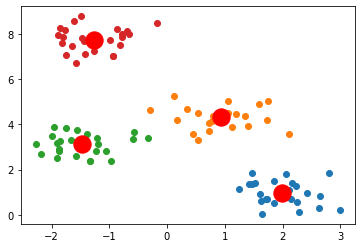

In [20]:
model.plot()

In [21]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, _, test_size=0.2, random_state=0)
X_train.shape

(80, 2)

In [22]:
kmeanMode = ScratchKMeans(n_clusters = 4, max_iter = 50, seed=0)
kmeanMode.fit(X_train)

array([[-1.2702941 ,  1.49531752, -1.24615984, -1.9435974 ],
       [ 7.76467286,  2.6846235 ,  2.7949776 ,  3.56535922]])

In [23]:
from sklearn import metrics
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [24]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.6423375429919727
2 : 1.6951988741812656
3 : 1.0363271391895246
4 : 0.6263796180120851
5 : 0.5982844168032159
6 : 0.5562266805608065
7 : 0.5241801554402011
8 : 0.48526878856090866
9 : 0.4520981402074131


Problem 8

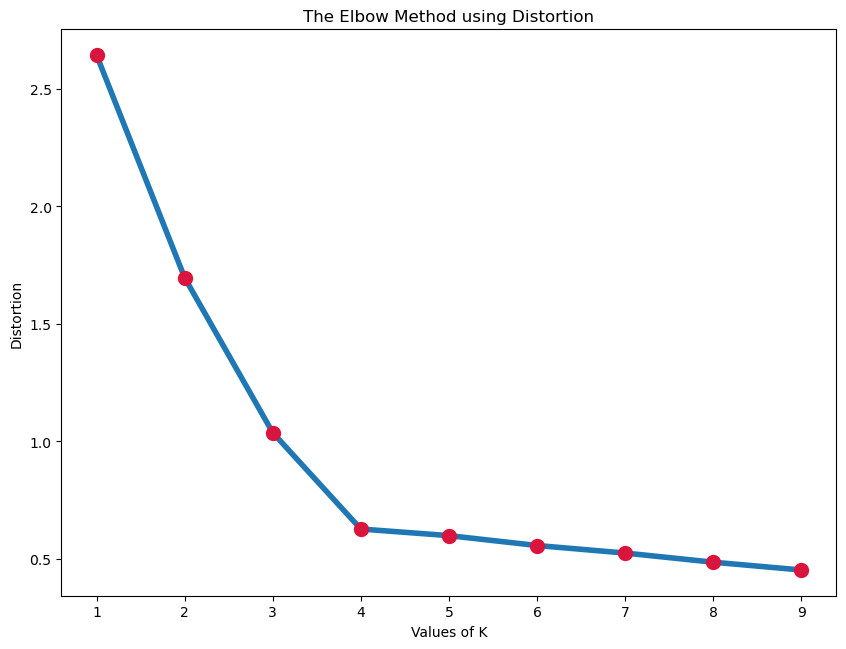

In [25]:
plt.plot(K, distortions, marker='o', markersize=6, markeredgewidth=5, markeredgecolor="crimson", linewidth=4)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

problem 10

In [26]:
whole_sale = pd.read_csv('wholesale customers data.csv')
whole_sale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [27]:
from sklearn.preprocessing import StandardScaler
data = whole_sale.drop(["Channel", "Region"], axis=1)
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data_std)
data_pca = pca.transform(data_std)


[0.44082893 0.72459292 0.84793705 0.94189209 0.98950481 1.        ]


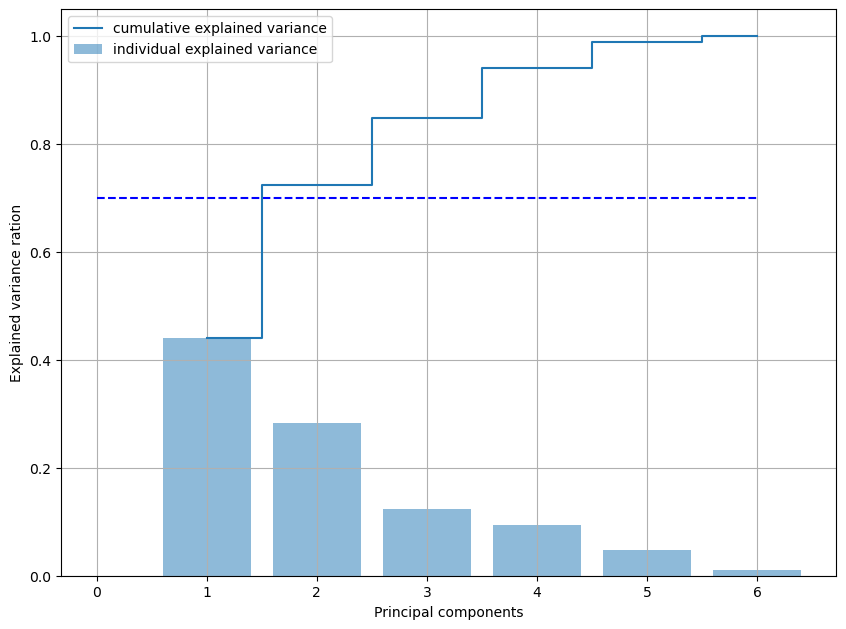

In [29]:
pca = PCA(n_components=None)
pca = pca.fit(data_std)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ration')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6, 'blue', linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

In [30]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(data_pca)
    kmeanModel.fit(data_pca)
 
    distortions.append(sum(np.min(cdist(data_pca, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / data_pca.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(data_pca, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / data_pca.shape[0]
    mapping2[k] = kmeanModel.inertia_

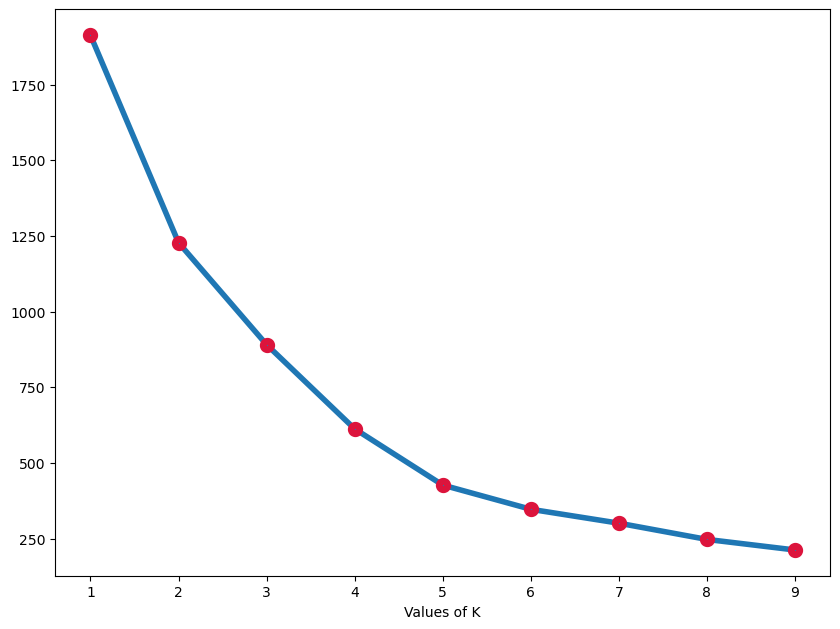

In [31]:
plt.plot(K, inertias, marker='o', markersize=6, markeredgewidth=5, markeredgecolor="crimson", linewidth=4)
plt.xlabel('Values of K')
plt.show()

<ipython-input-32-ce031e12cec5>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


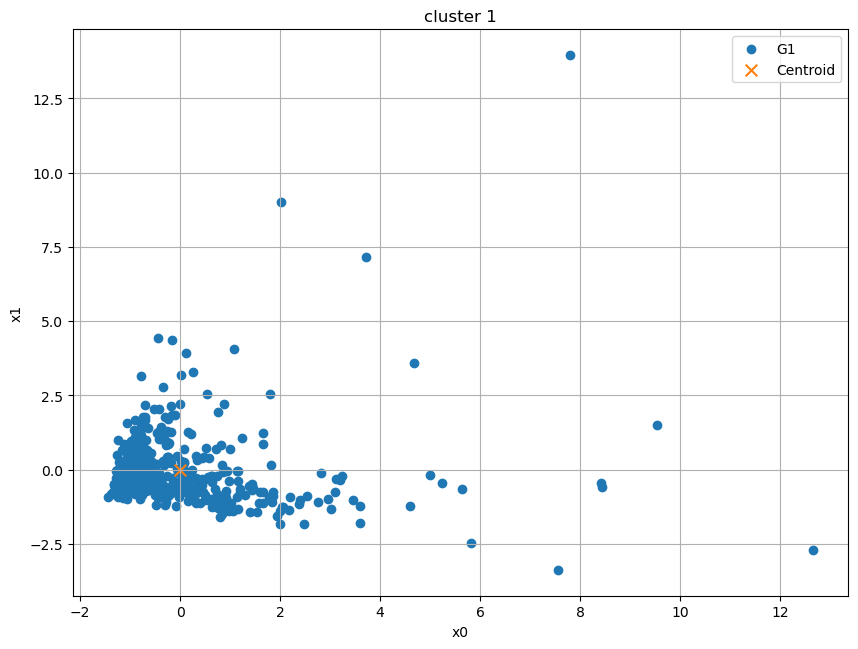

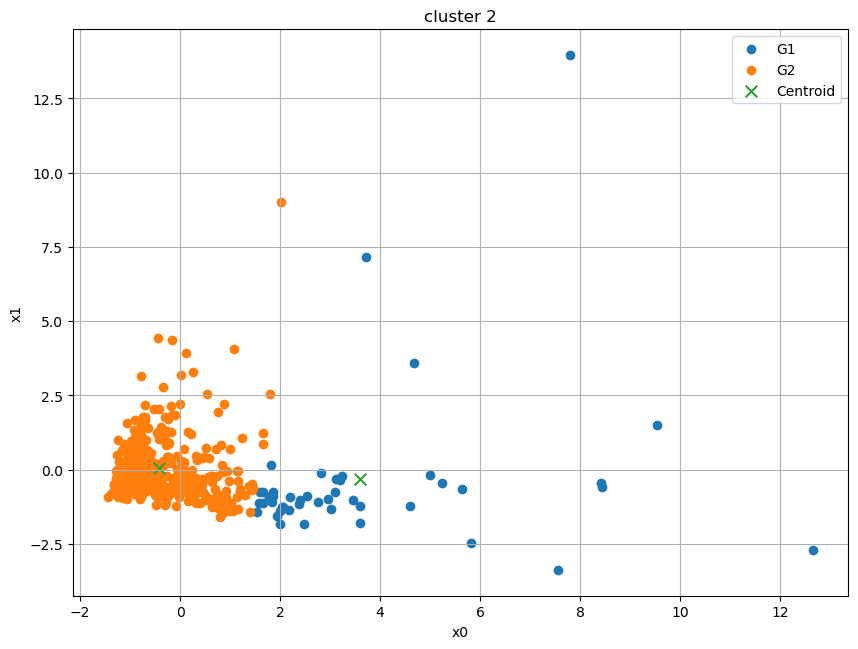

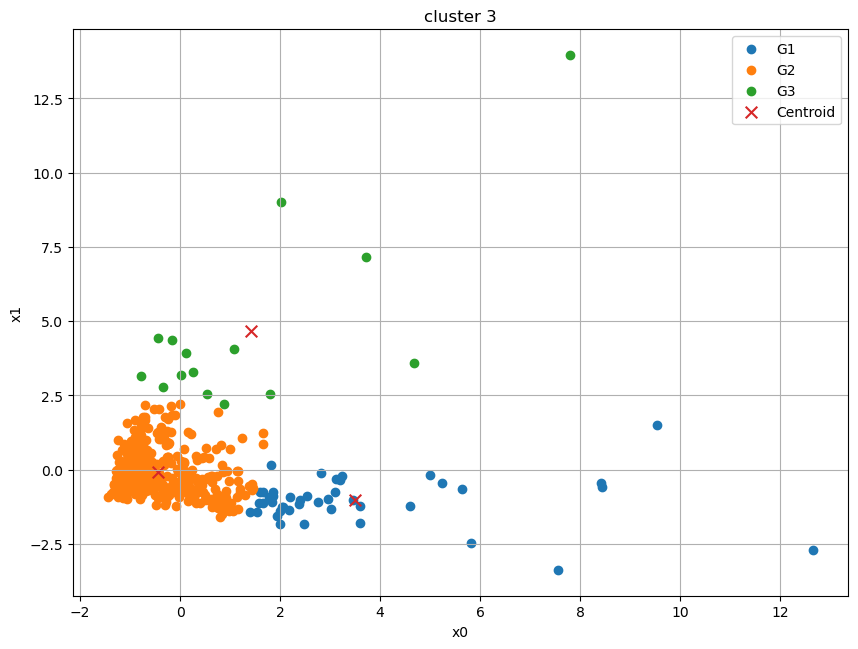

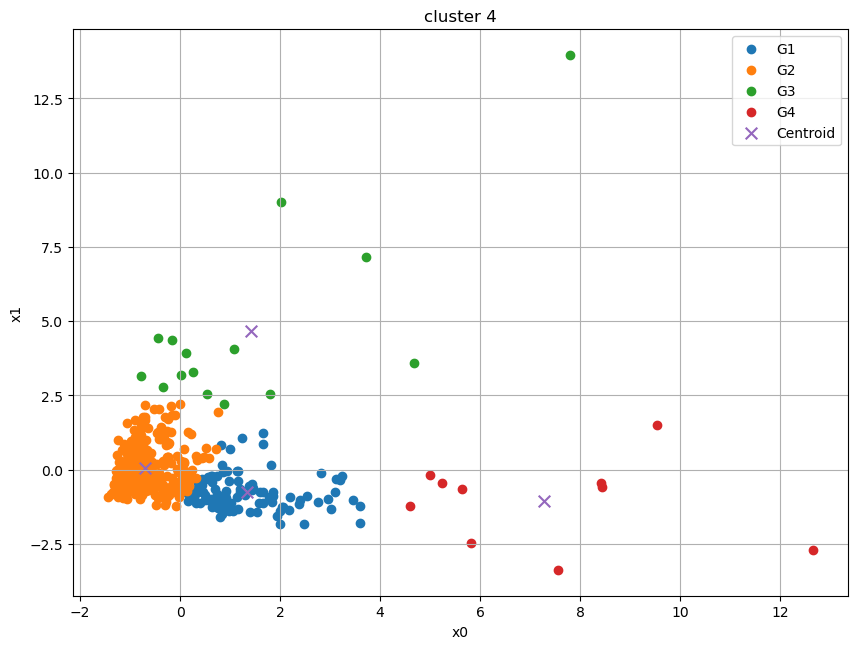

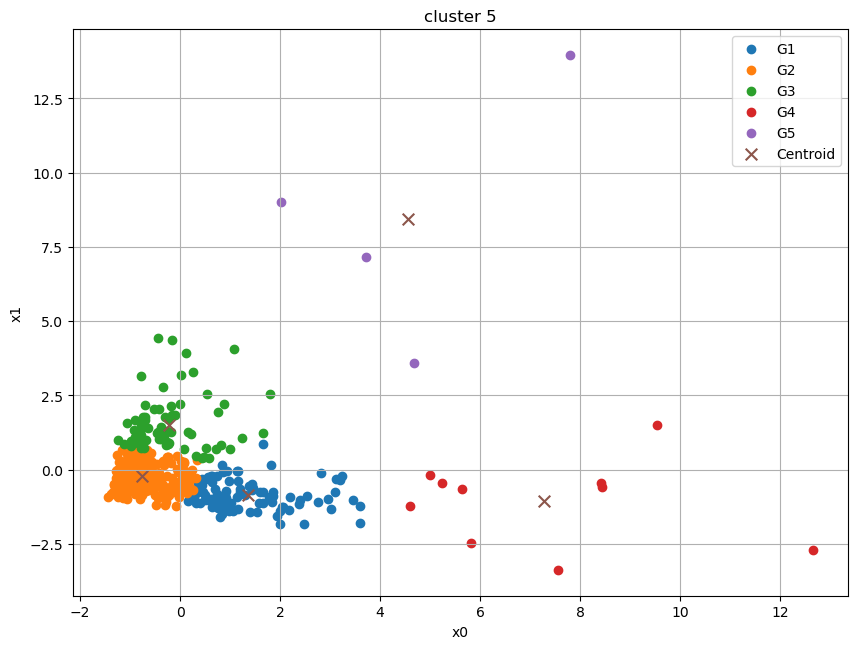

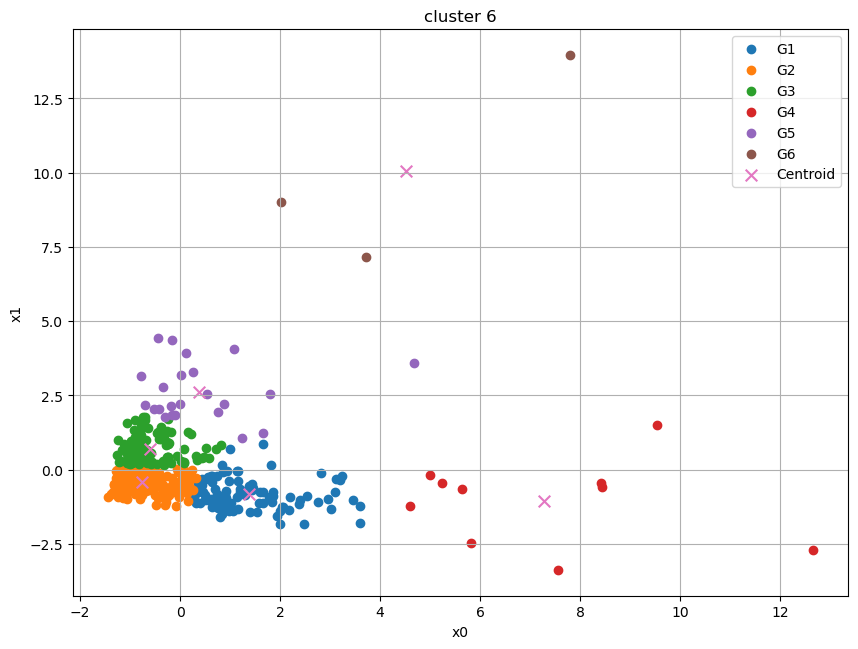

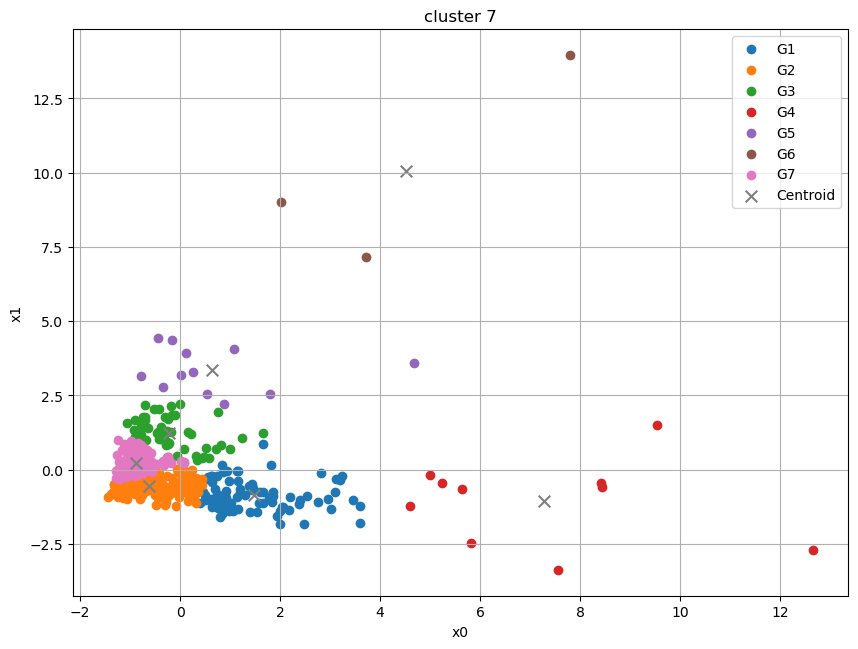

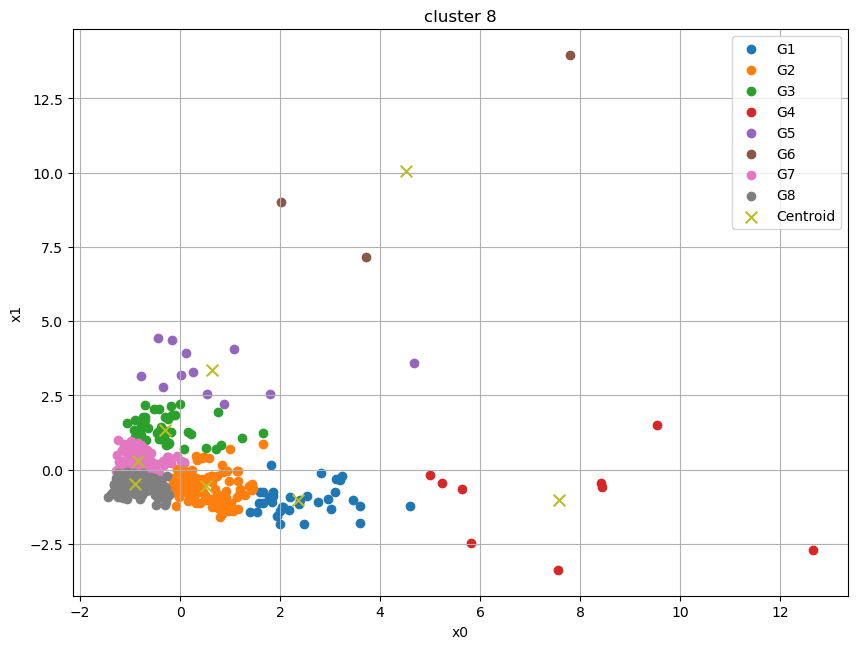

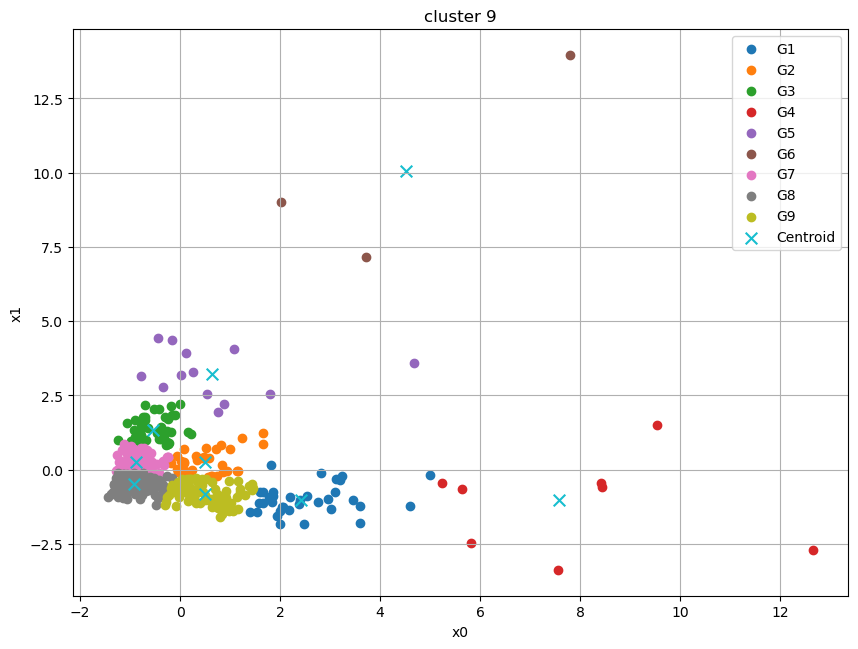

In [32]:
model = ScratchKMean(n_clusters = 10, max_iter = 15, verbose=False, tol=0, seed=3)
model.fit(data_pca)
cl = model.predict(data_pca)
for i in range(1,10):
    model = ScratchKMean(n_clusters = i, max_iter = 15, verbose=False, tol=0, seed=3)
    model.fit(data_pca)
    cl = model.predict(data_pca)
    
    fig = plt.figure()

    ax = fig.add_subplot(1,1,1)
    for i in range(np.unique(cl).shape[0]):
        ax.scatter(data_pca[:,0][cl==i], data_pca[:,1][cl==i], label='G{}'.format(i+1))
    ax.scatter(model.new_co[:,0], model.new_co[:,1], label="Centroid", s=70, marker='x')
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_title('cluster {}'.format(i+1))
    ax.grid(True)

    ax.legend(loc='upper right')
    fig.show()

In [33]:
whole_sale.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

problem 11

<ipython-input-34-0a641c212ddd>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


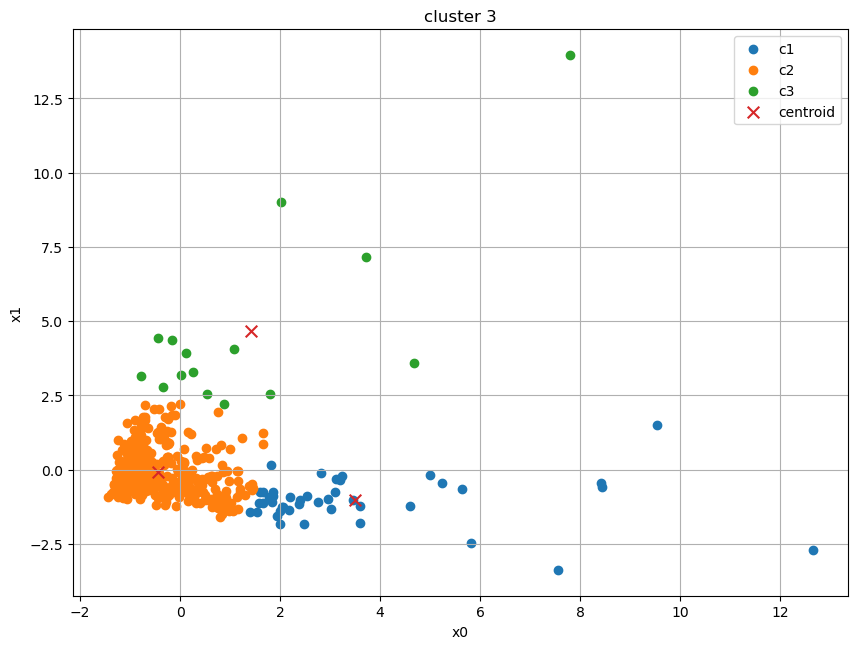

In [34]:
ax = fig.add_subplot(1,1,1)
model = ScratchKMean(n_clusters=3, max_iter=15, verbose=False, tol=0, seed=3)
model.fit(data_pca)
cl = model.predict(data_pca)

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
for i in range(np.unique(cl).shape[0]):
    ax.scatter(data_pca[:,0][cl==i], data_pca[:,1][cl==i], label='c{}'.format(i+1))
ax.scatter(model.new_co[:,0], model.new_co[:,1], label='centroid', s=70, marker='x')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster {}'.format(i+1))
ax.grid(True)

ax.legend(loc='upper right')

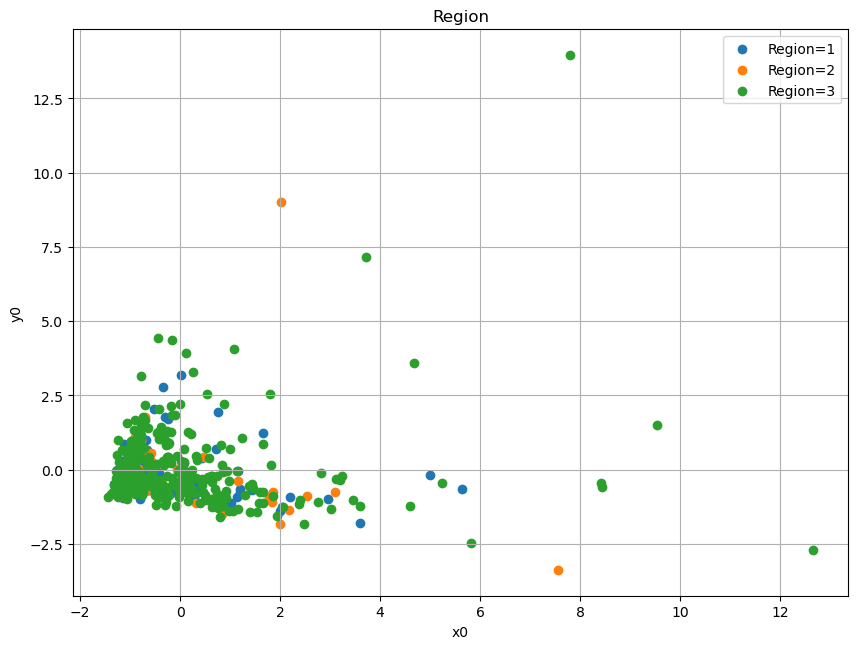

In [35]:
whole_sale["Region"].unique()
plt.scatter(data_pca[:,0][whole_sale['Region']==1], data_pca[:, 1][whole_sale["Region"]== 1], label = "Region=1")
plt.scatter(data_pca[:,0][whole_sale['Region']==2], data_pca[:, 1][whole_sale["Region"]== 2], label = "Region=2")
plt.scatter(data_pca[:,0][whole_sale['Region']==3], data_pca[:, 1][whole_sale["Region"]== 3], label = "Region=3")
plt.xlabel('x0')
plt.ylabel('y0')
plt.title('Region')
plt.grid(True)

plt.legend(loc='upper right')

<ipython-input-36-2cbb9e2776de>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


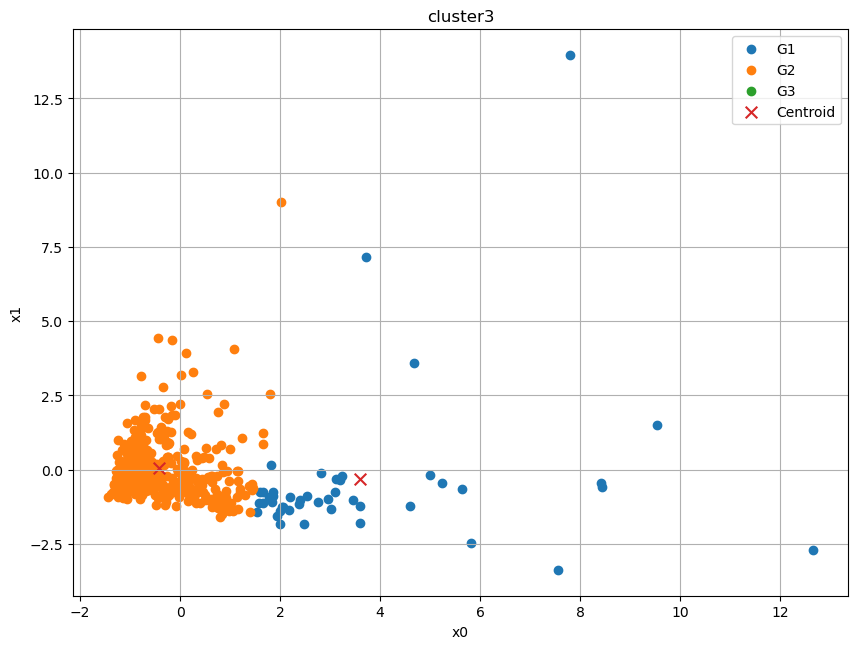

In [36]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMean(n_clusters = 2, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(data_pca)
cl = KM.predict(data_pca)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(3):
    ax.scatter(data_pca[:,0][cl==i], data_pca[:,1][cl==i], label='G{}'.format(i+1))
ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='x')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster{}'.format(i+1))
ax.grid(True)
ax.legend(loc='upper right')

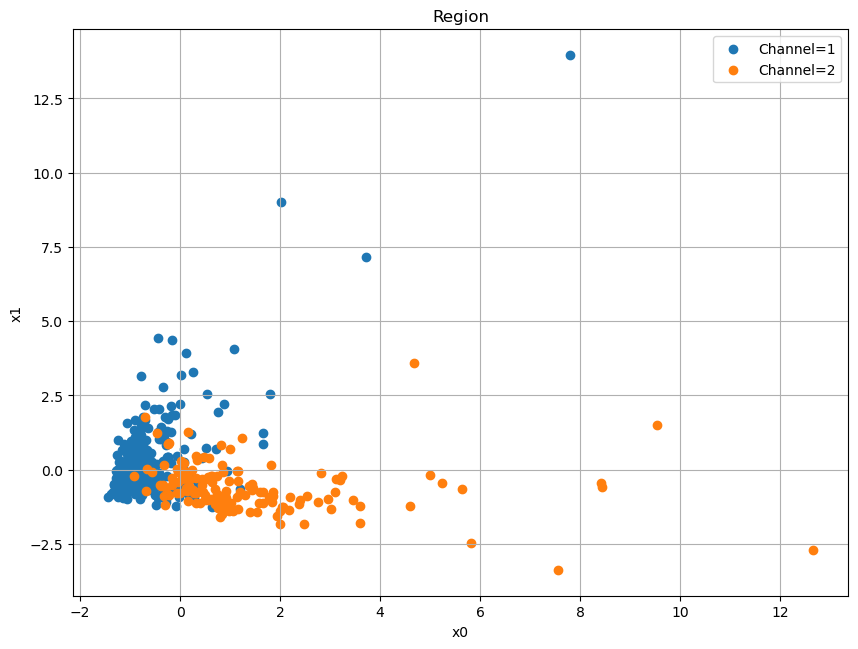

In [37]:
whole_sale["Channel"].unique()
plt.scatter(data_pca[:,0][whole_sale["Channel"] == 1], data_pca[:,1][whole_sale["Channel"] == 1], label = "Channel=1")
plt.scatter(data_pca[:,0][whole_sale["Channel"] == 2], data_pca[:,1][whole_sale["Channel"] == 2], label = "Channel=2")
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Region')
plt.grid(True)

plt.legend(loc='upper right')

<ipython-input-38-0ee075e9b661>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


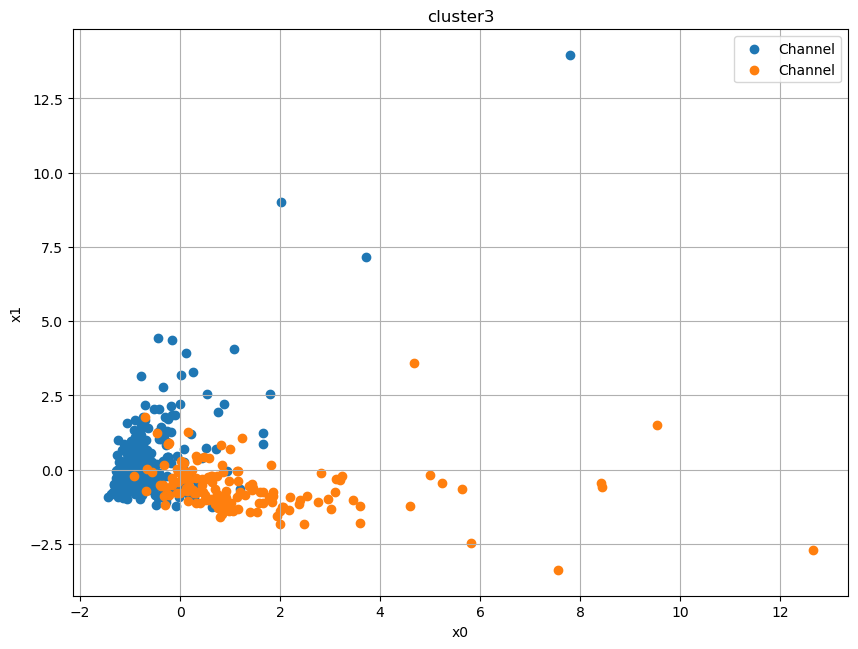

In [38]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMean(n_clusters = 2, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(data_pca)
cl = KM.predict(data_pca)
fig = plt.figure()
Channel = np.array(whole_sale["Channel"])
ax = fig.add_subplot(1,1,1)
for i in range(1,3):
    ax.scatter(data_pca[:,0][whole_sale["Channel"]==i], data_pca[:,1][whole_sale["Channel"]==i], label='Channel')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster{}'.format(i+1))
ax.grid(True)

ax.legend(loc='upper right')

<ipython-input-39-4ee03175a9c2>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


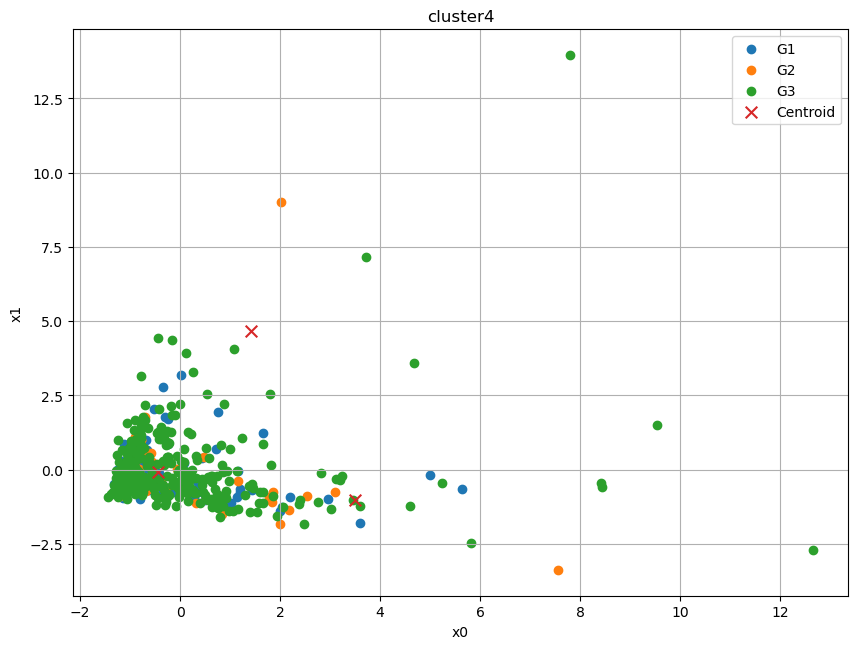

In [39]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMean(n_clusters = 2, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(data_pca)
cl = KM.predict(data_pca)
fig = plt.figure()
Region = np.array(whole_sale["Region"])
ax = fig.add_subplot(1,1,1)
for i in range(1,4):
    ax.scatter(data_pca[:,0][Region==i], data_pca[:,1][Region==i], label='G{}'.format(i))
ax.scatter(model.new_co[:,0], model.new_co[:,1], label="Centroid", s=70, marker='x')    
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster{}'.format(i+1))
ax.grid(True)

ax.legend(loc='upper right')

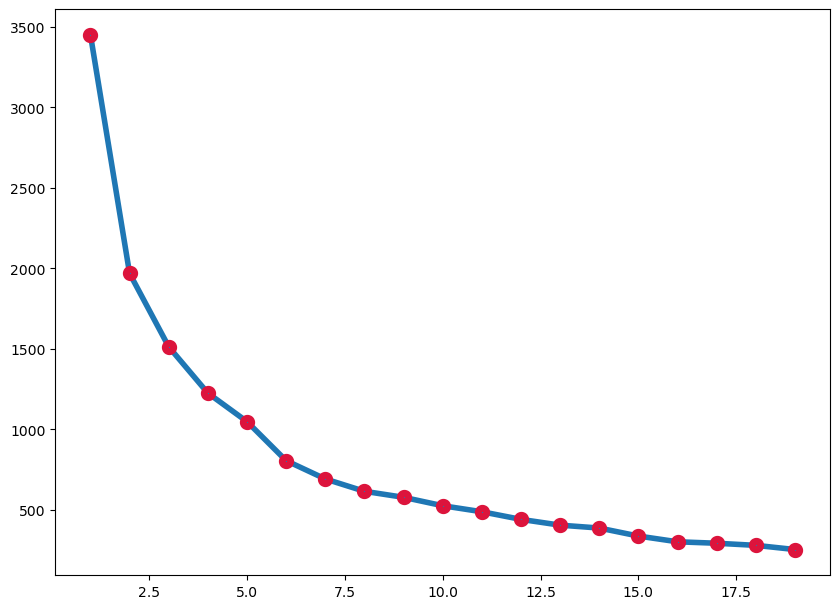

In [40]:
Wholesale_log = np.log(data)
for i in data.columns:
    Wholesale_log[i] == np.log(data[i])
    
pca = PCA(n_components = 2)
pca = pca.fit(Wholesale_log)
Wholesale_pca_log = pca.transform(Wholesale_log)

sse = []
n_cl = []
for i in range(1,20):
    n_cl.append(i)
    KM = ScratchKMean(n_clusters = i, max_iter = 15, verbose=False, tol=0, seed=3)
    KM.fit(Wholesale_pca_log)
    sse.append(KM.SSE)
plt.plot(n_cl, sse, marker="o", markersize=6, markeredgewidth=5, markeredgecolor="crimson", linewidth=4)

<ipython-input-41-6a0d09134ed1>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


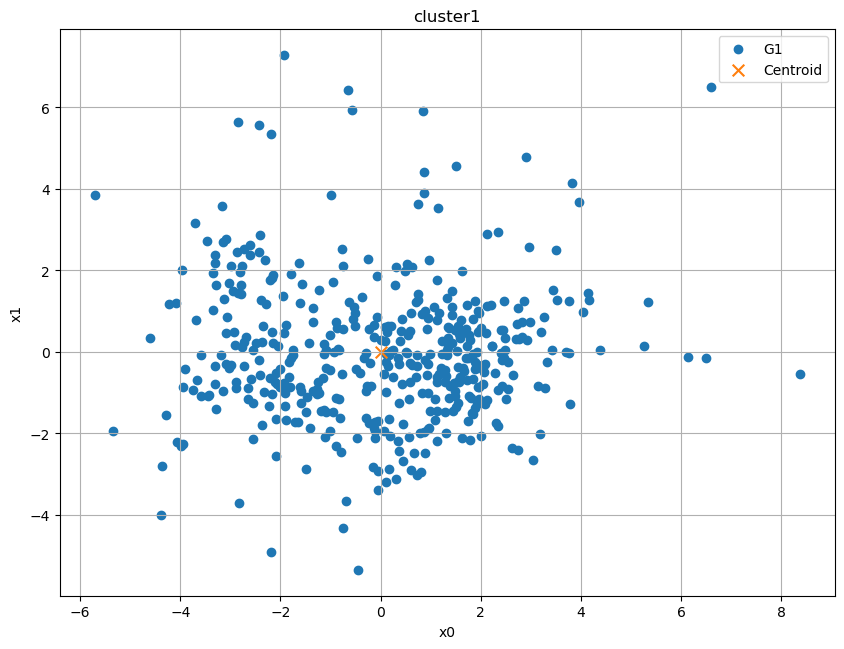

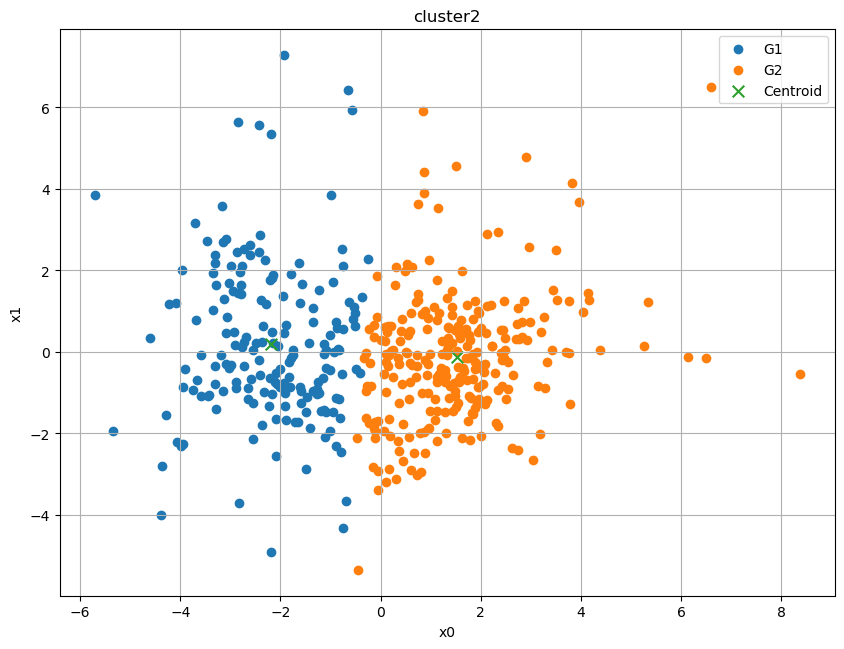

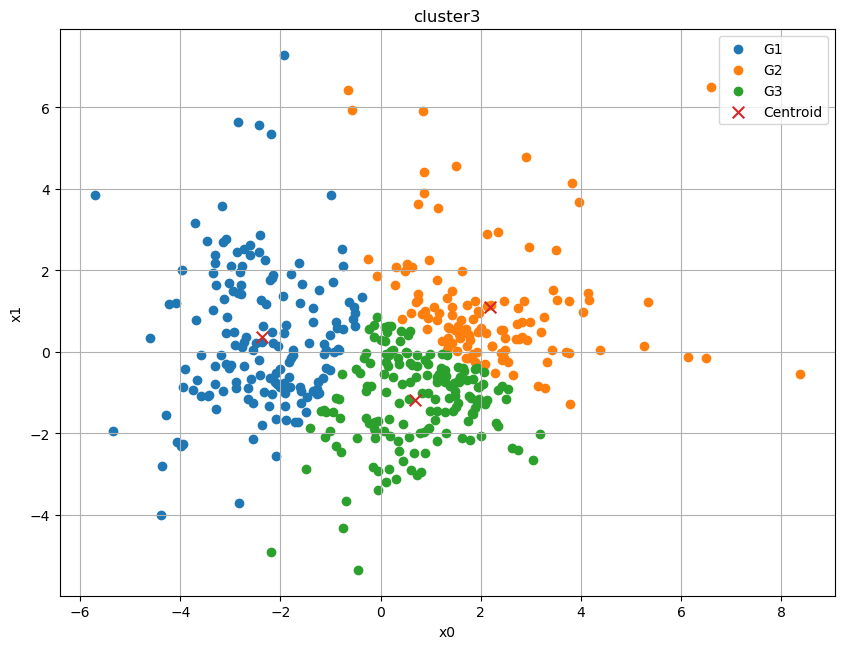

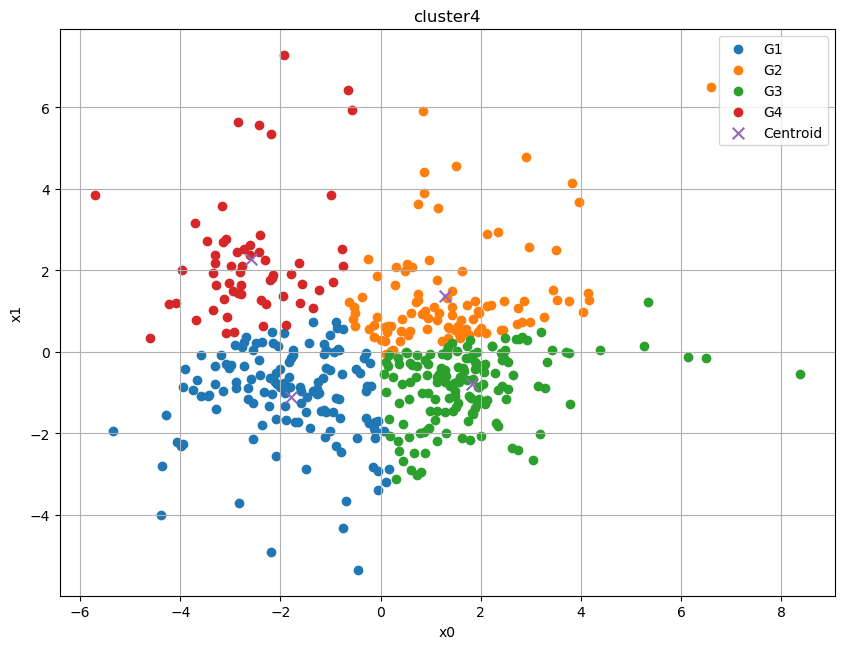

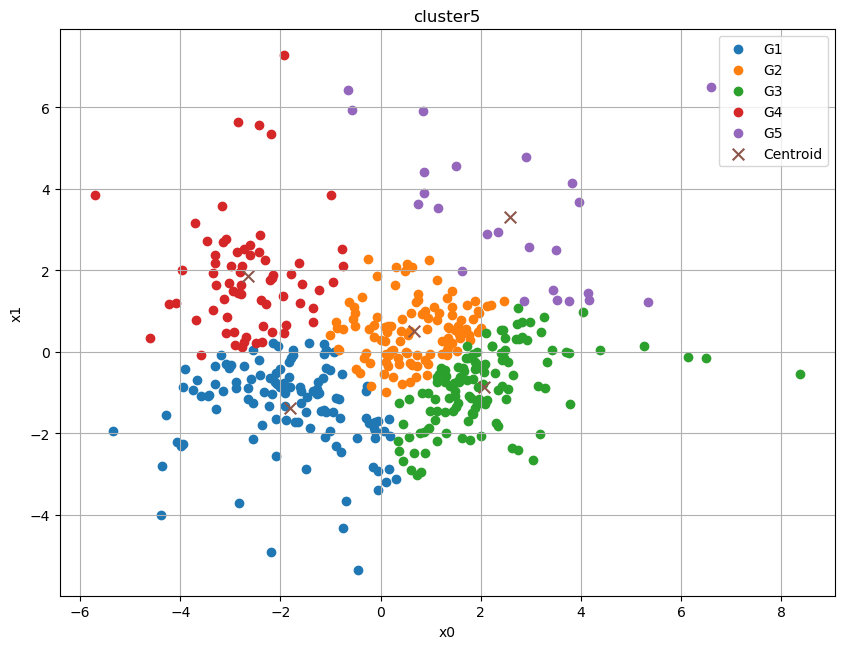

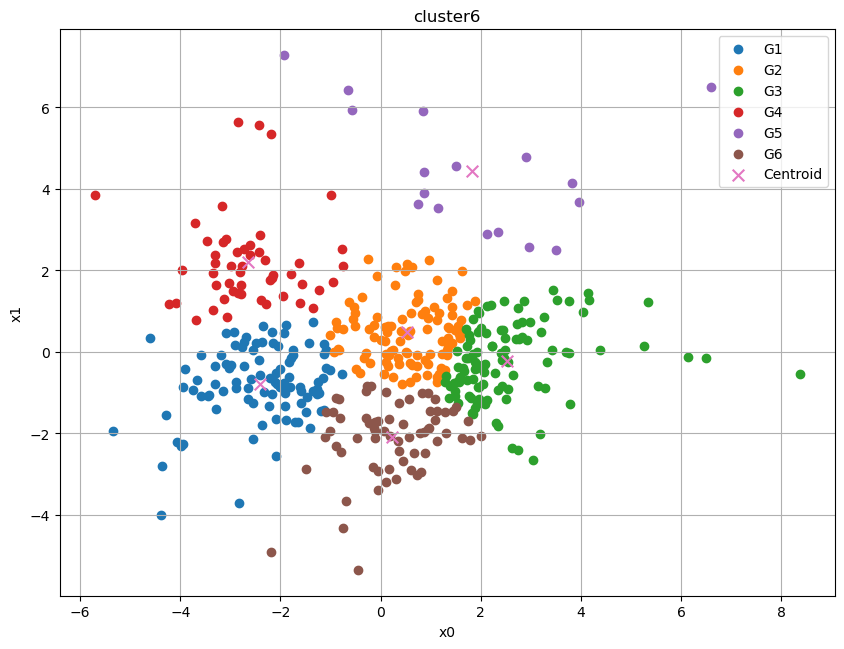

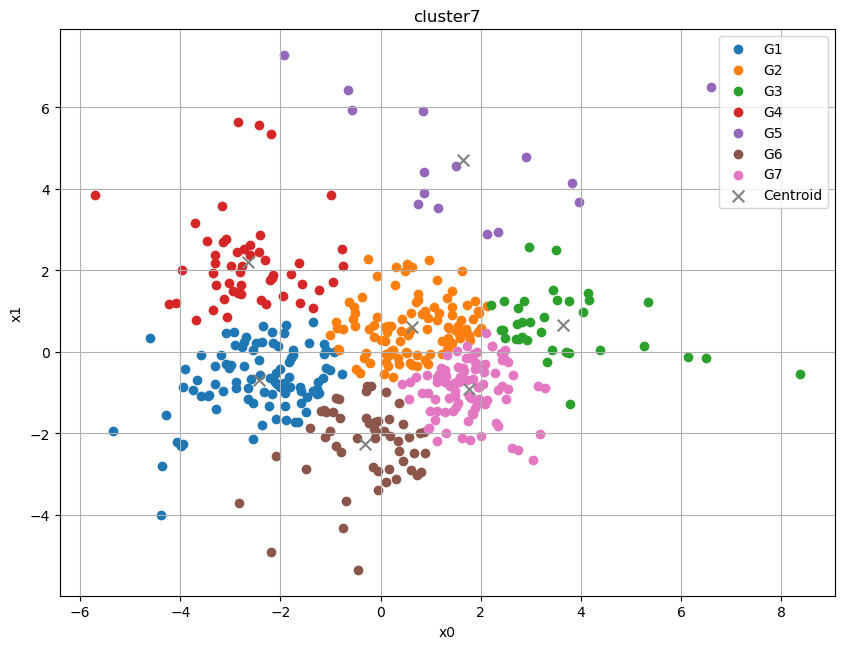

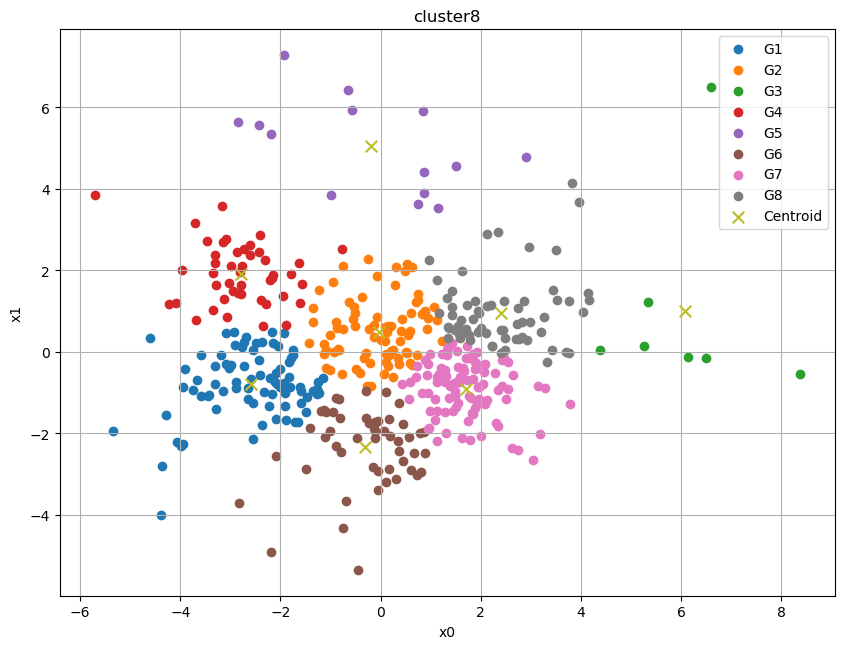

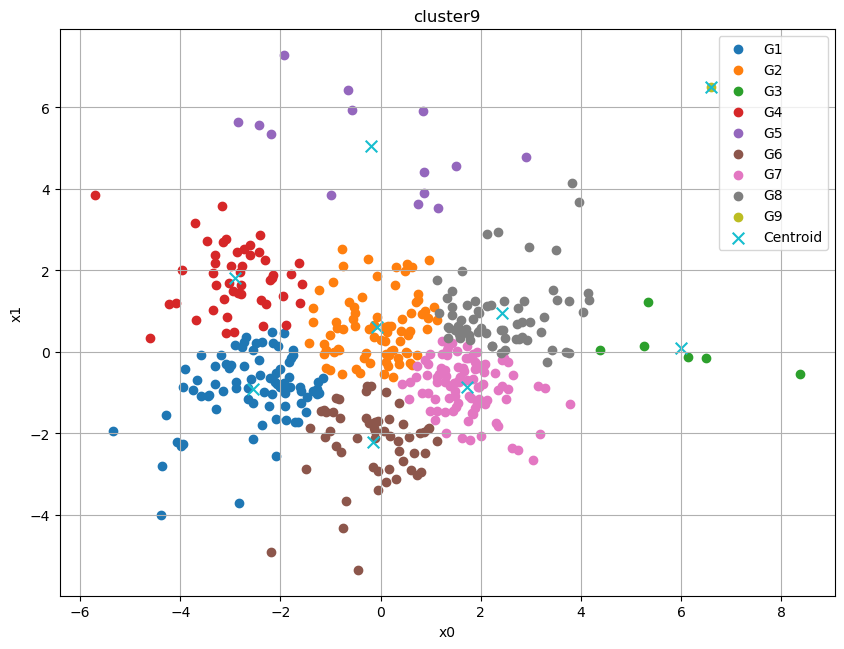

In [41]:
for i in range(1,10):
    KM = ScratchKMean(n_clusters = i, max_iter = 15, verbose=False, tol=0, seed=3)
    KM.fit(Wholesale_pca_log)
    cl = KM.predict(Wholesale_pca_log)
    
    fig = plt.figure()

    ax = fig.add_subplot(1,1,1)
    for i in range(np.unique(cl).shape[0]):
        ax.scatter(Wholesale_pca_log[:,0][cl==i], Wholesale_pca_log[:,1][cl==i], label='G{}'.format(i+1))
    ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='x')
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_title('cluster{}'.format(i+1))
    ax.grid(True)

    ax.legend(loc='upper right')
    fig.show()

<ipython-input-42-6db8ebdf152d>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


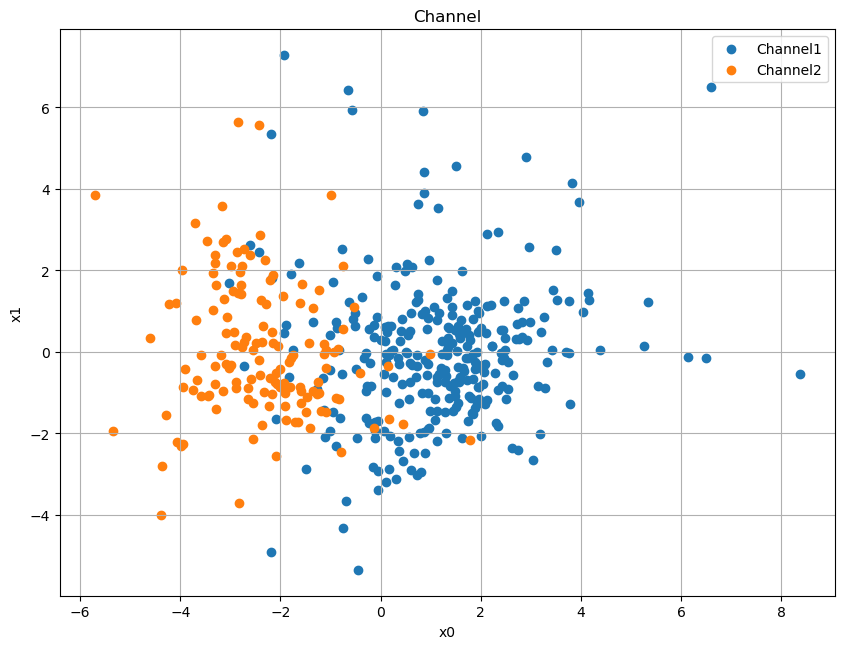

In [42]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMean(n_clusters = 2, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca_log)
cl = KM.predict(Wholesale_pca_log)
fig = plt.figure()
Channel = np.array(whole_sale["Channel"])
ax = fig.add_subplot(1,1,1)
for i in range(1,3):
    ax.scatter(Wholesale_pca_log[:,0][Channel==i], Wholesale_pca_log[:,1][Channel==i], label='Channel{}'.format(i))
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title("Channel")
ax.grid(True)

ax.legend(loc='upper right')

<ipython-input-43-1dabcf539768>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


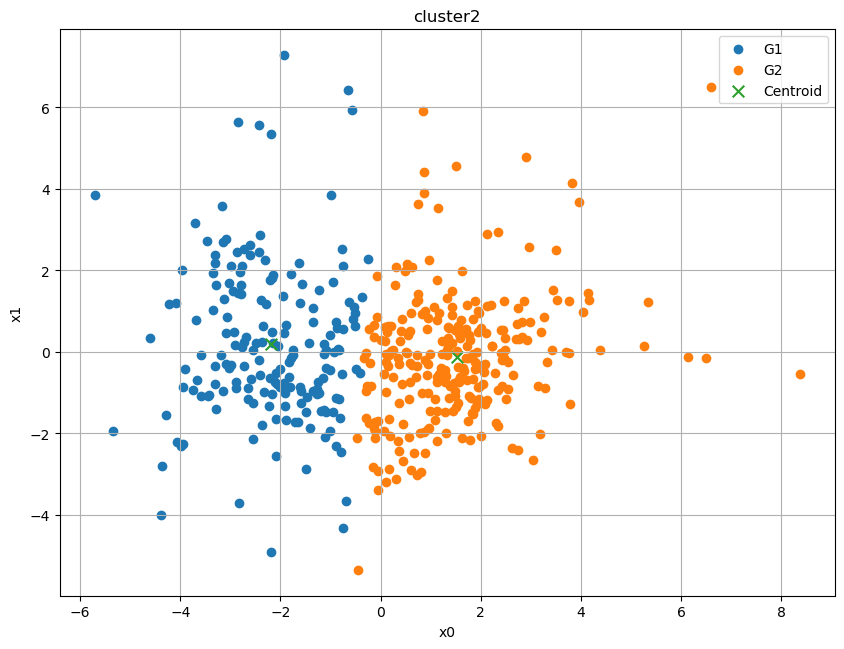

In [43]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMean(n_clusters = 2, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca_log)
cl = KM.predict(Wholesale_pca_log)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(2):
    ax.scatter(Wholesale_pca_log[:,0][cl==i], Wholesale_pca_log[:,1][cl==i], label='G{}'.format(i+1))
ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='x')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster{}'.format(i+1))
ax.grid(True)

ax.legend(loc='upper right')

In [44]:
data["cluster"] = cl

<ipython-input-45-4ac55b148e4a>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


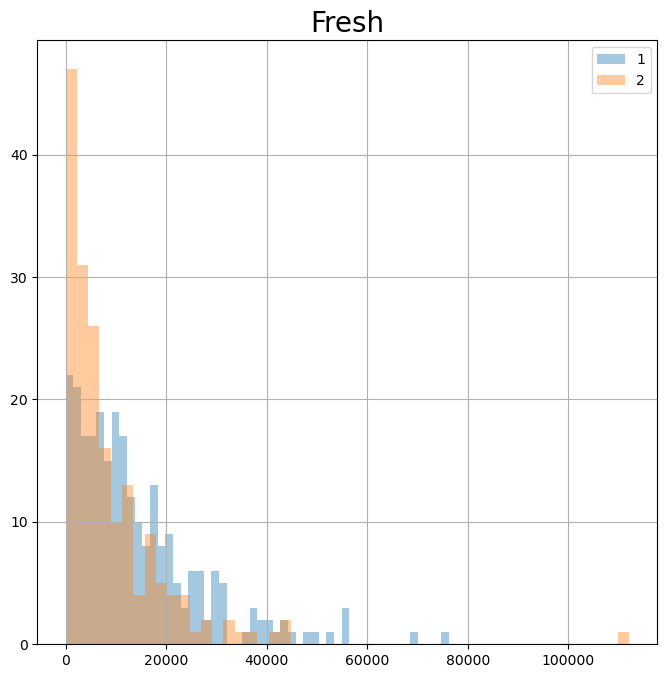

In [45]:
Wholesale_cl1 = whole_sale[data["cluster"] == 1]
Wholesale_cl0 = whole_sale[data["cluster"] == 0]
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale_cl1["Fresh"],bins=50,alpha=0.4, label = "1")
ax1.hist(Wholesale_cl0["Fresh"],bins=50, alpha=0.4, label = "2")
ax1.set_title('Fresh',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

<ipython-input-46-8f1bcacb6956>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


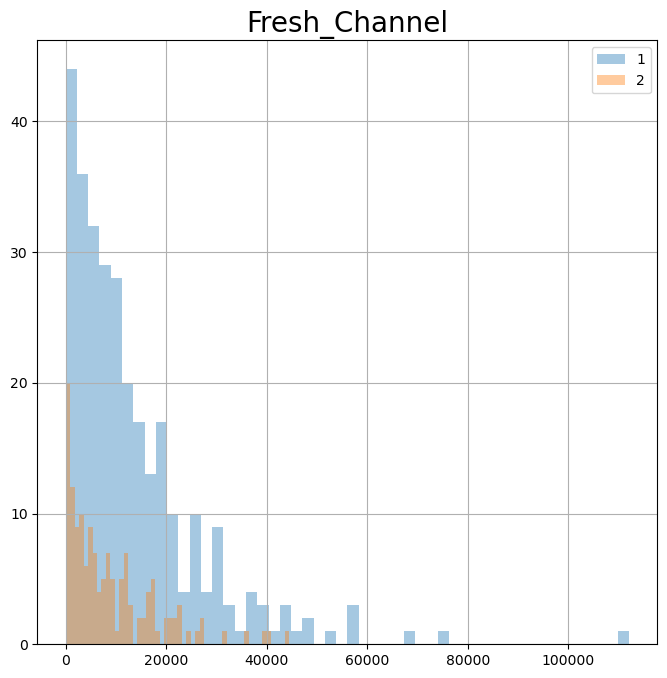

In [46]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(whole_sale["Fresh"][whole_sale["Channel"] == 1],bins=50, alpha=0.4, label = "1")
ax1.hist(whole_sale["Fresh"][whole_sale["Channel"] == 2],bins=50,alpha=0.4, label = "2")
ax1.set_title('Fresh_Channel',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

<ipython-input-47-baf036748d91>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


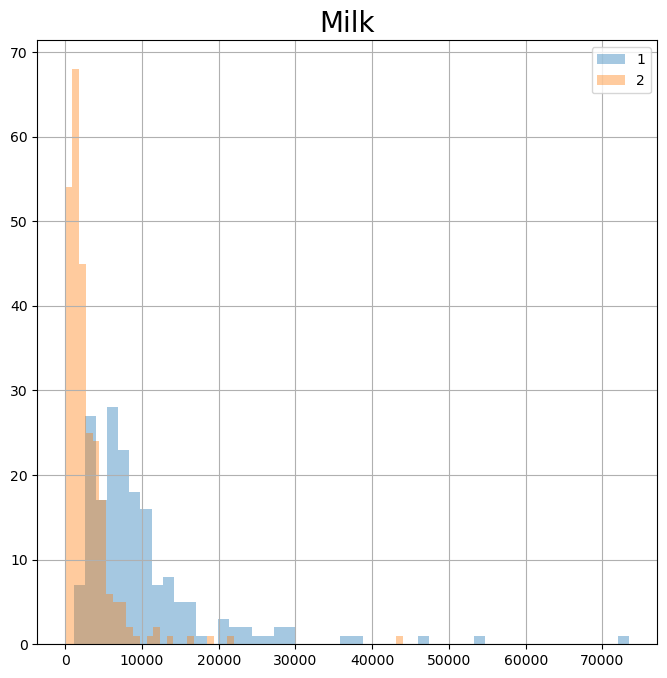

In [47]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale_cl0["Milk"],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale_cl1["Milk"],bins=50, alpha=0.4, label = "2")
ax1.set_title('Milk',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

<ipython-input-48-684a012e7c5f>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


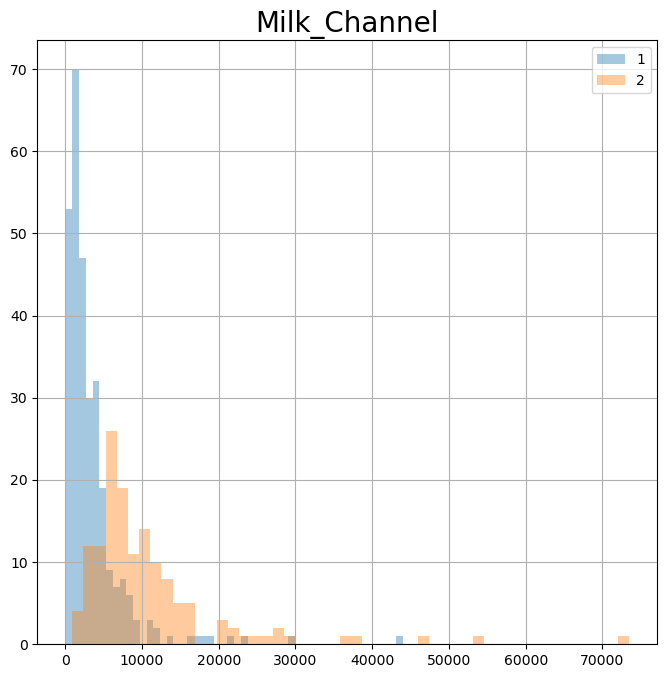

In [48]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(whole_sale["Milk"][whole_sale["Channel"] == 1],bins=50, alpha=0.4, label = "1")
ax1.hist(whole_sale["Milk"][whole_sale["Channel"] == 2],bins=50,alpha=0.4, label = "2")
ax1.set_title('Milk_Channel',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

<ipython-input-49-c0f91c829a70>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


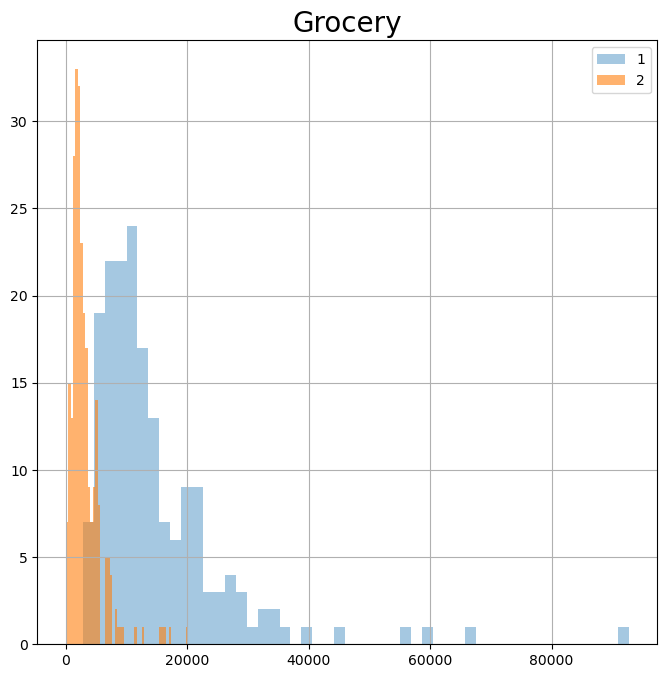

In [49]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale_cl0["Grocery"],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale_cl1["Grocery"],bins=50, alpha=0.6, label = "2")
ax1.set_title('Grocery',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

problen 12

In [50]:
Wholesale2 = pd.read_csv('Wholesale customers data.csv')
Wholesale3 = Wholesale2.drop(["Channel", "Region"], axis=1)
Wholesale3

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [51]:
import pandas as pd
KM = ScratchKMean(n_clusters = 5, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(data_pca)
cl = KM.predict(data_pca)
data_cl0 = Wholesale3[cl==0]
data_cl1 = Wholesale3[cl==1]
data_cl2 = Wholesale3[cl==2]
data_cl3 = Wholesale3[cl==3]
data_cl4 = Wholesale3[cl==4]
cl_data=pd.DataFrame(cl)
cl_data = cl_data.rename(columns={0: "cluster"})
Wholesale_add_cl= pd.concat([Wholesale3, cl_data], axis=1)

#groupby
Wholesale_mean_cl = Wholesale_add_cl.groupby("cluster").mean()

In [52]:
Wholesale_mean_cl.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,5282.846154,10403.164835,16838.901099,1266.384615,7436.967033,1505.923077
1,9148.992337,2866.084291,3816.011494,2036.333333,996.831418,930.072797
2,27618.486486,5158.810811,5552.851351,7501.054054,964.486486,2474.351351
3,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
4,52022.000000,31696.000000,18490.750000,29825.500000,2699.000000,19656.250000


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

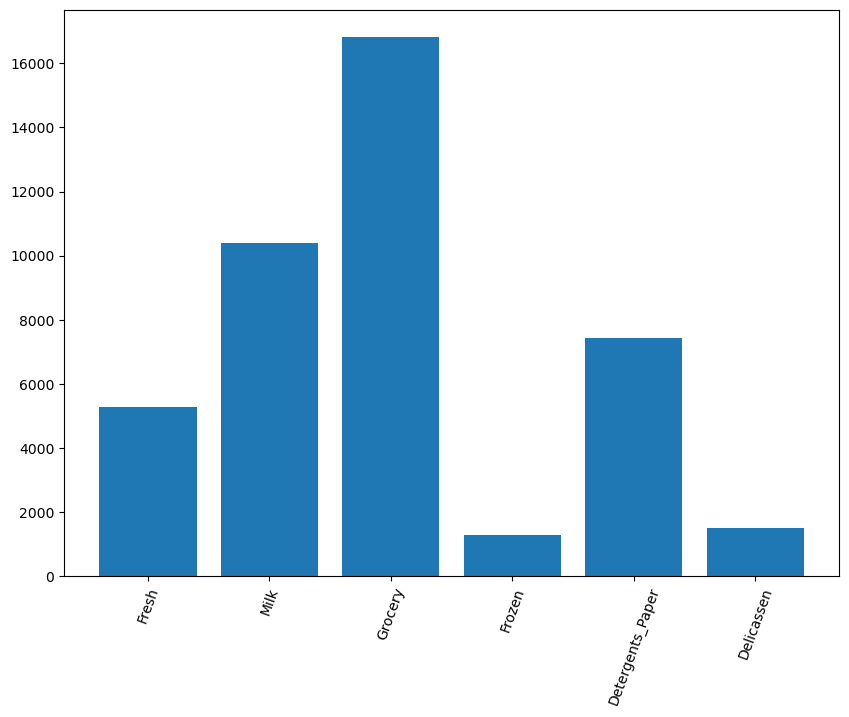

In [53]:
height = np.array(Wholesale_mean_cl.iloc[0])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

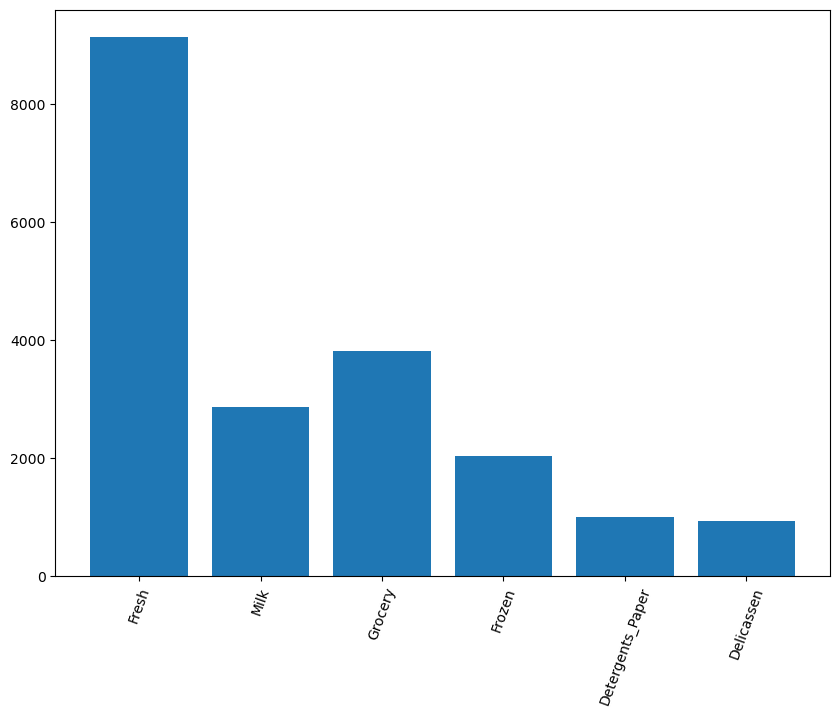

In [54]:
height = np.array(Wholesale_mean_cl.iloc[1])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

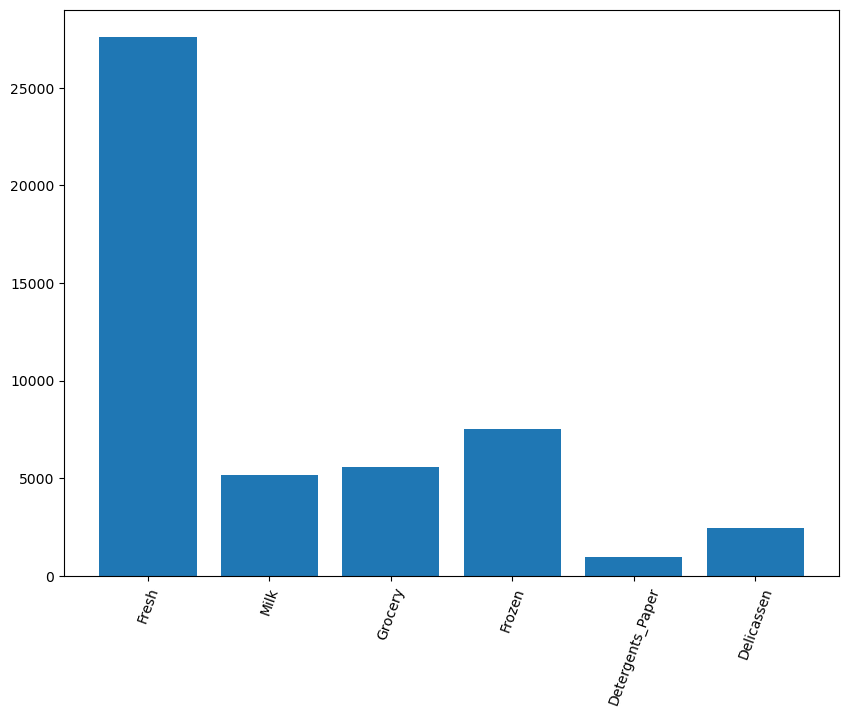

In [55]:
height = np.array(Wholesale_mean_cl.iloc[2])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

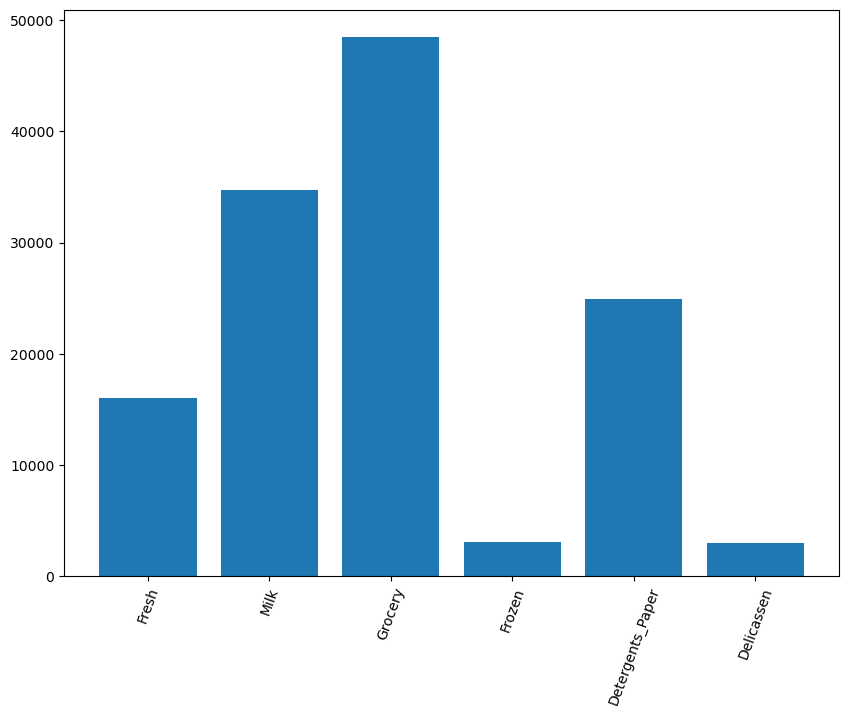

In [56]:
height = np.array(Wholesale_mean_cl.iloc[3])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

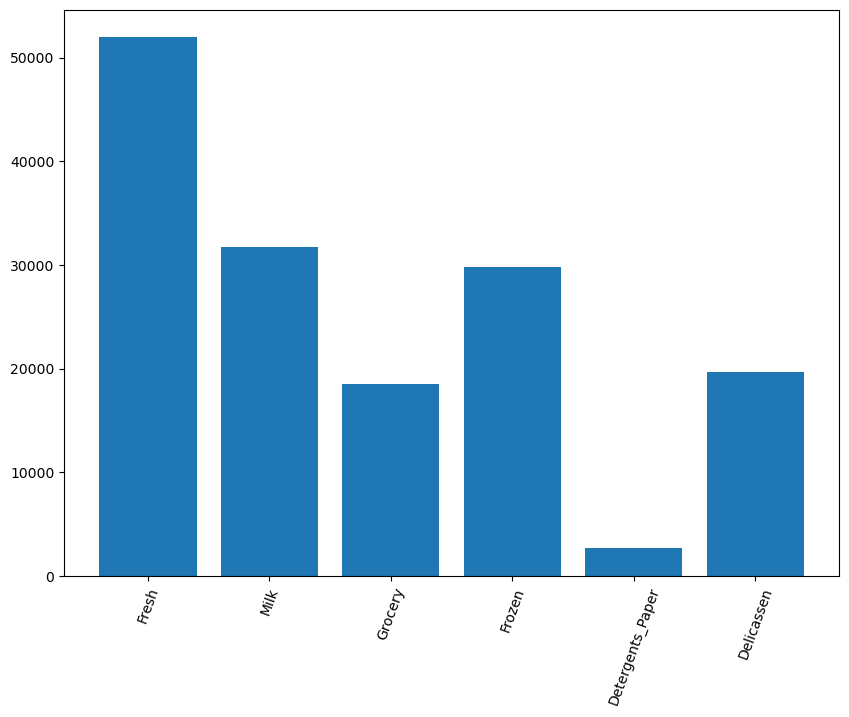

In [57]:
height = np.array(Wholesale_mean_cl.iloc[4])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)